# Problem Statement
Titanic Data Set is a popular data in kaggle and the objective is to predict the survivors in the test.csv
this is the files you will find:

* train.csv
* test.csv


## Kaggle Score

0.79425


[titanic project](https://www.kaggle.com/nawafalawdan/titanic-project?scriptVersionId=23134958)


# first let's import all the needed labarires 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

sns.set(style='white', context='notebook', palette='deep')

Load the data

In [3]:
test_data = pd.read_csv("../DATA/test.csv")
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
train_data = pd.read_csv("../DATA/train.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


EDA 

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.shape

(891, 12)

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
test_data.shape

(418, 11)

In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Train dataset** There are 177 data missing in AGE feature & 687 in Cabin feature & 2 in Emarked feature

In [12]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Test dataset** There are 86 data missing in AGE feature & 327 in Cabin feature & 1 in Fare feature

###### Heatmap showing the missing values in all features

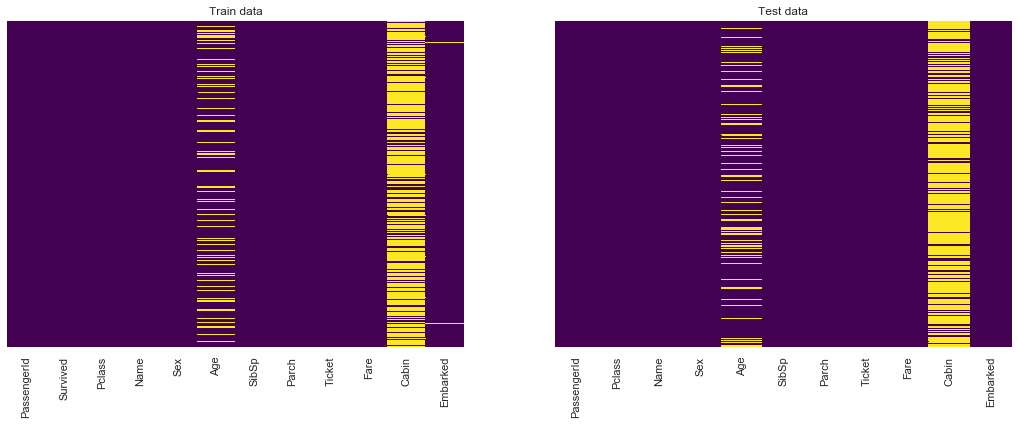

In [13]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train_data.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test_data.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

###### featuers distrbuation - Histogram for Train dataset

Age feature look like a normal distrbuation<br>
Fare feature is right skewed.<br>

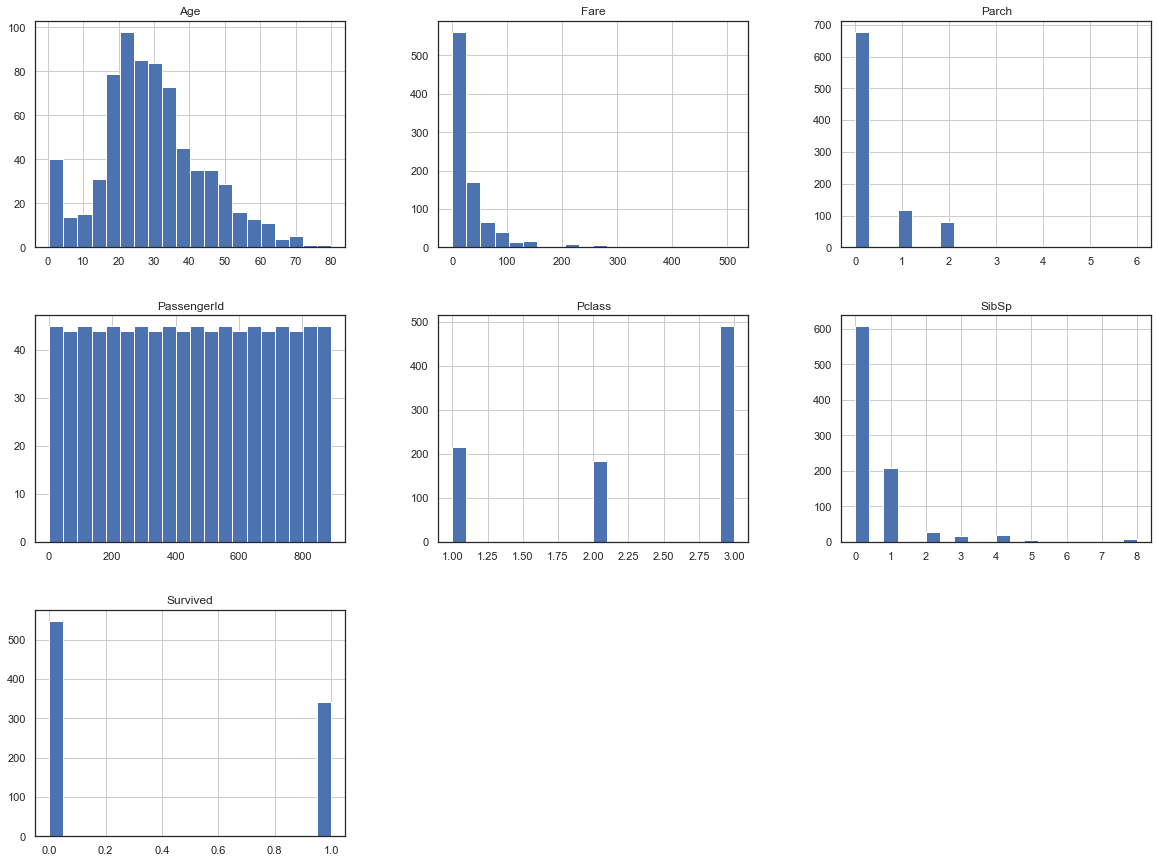

In [14]:
train_data.hist(bins=20,figsize=(20,15))
plt.show()

###### featuers distrbuation - Histogram for Test dataset

Age feature look like a normal distrbuation<br>
Fare feature is right skewed.<br>

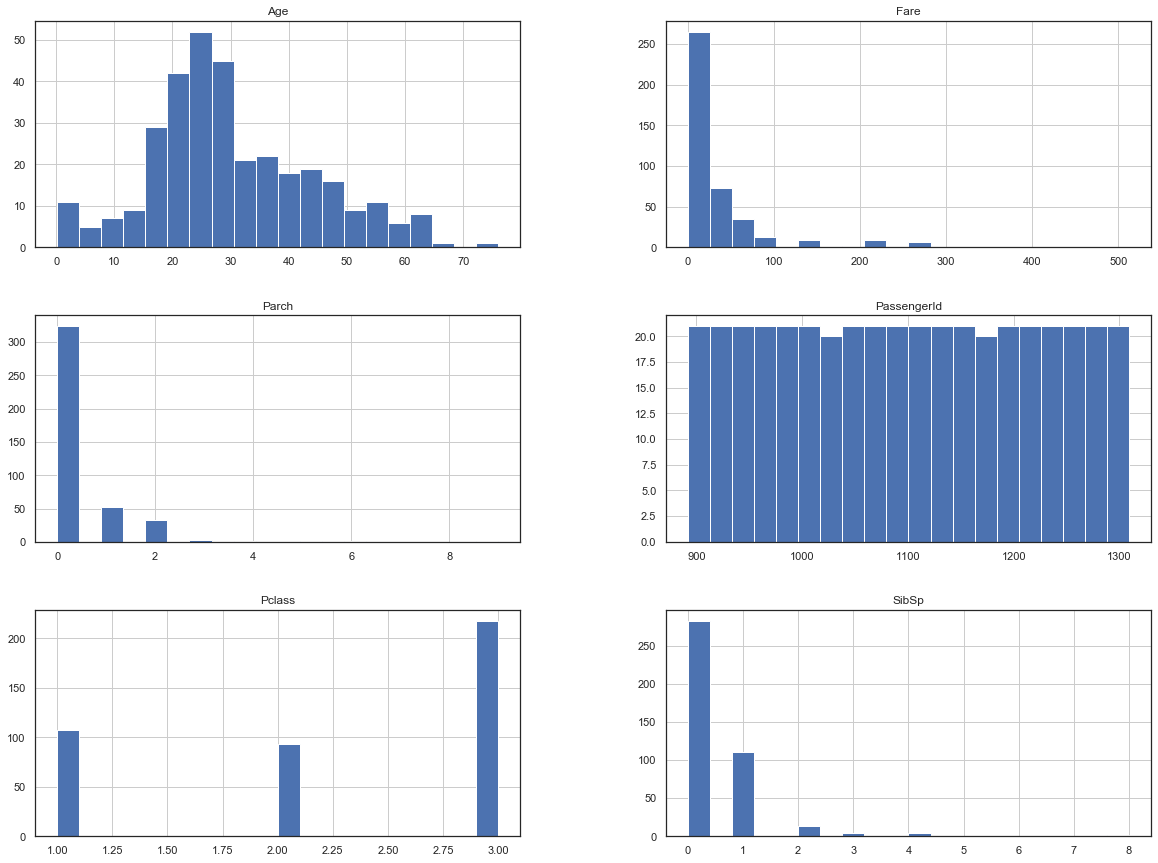

In [15]:
test_data.hist(bins=20,figsize=(20,15))
plt.show()

we can tell from the barplot below, that the female gender has more surviving probability

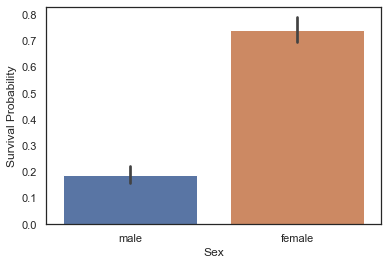

In [16]:
sex = sns.barplot(x="Sex",y="Survived",data=train_data)
sex = sex.set_ylabel("Survival Probability")

In [17]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


from the barplot below we can tell, that the C embarked observations survived more than others.

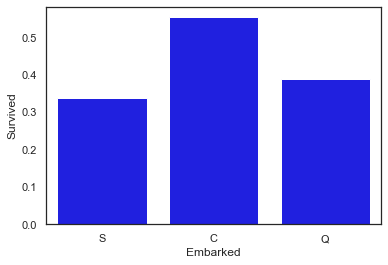

In [18]:
sns.barplot(x='Embarked',y='Survived',data=train_data,color='blue',ci=None);

###### heatmap showing the corrlation between the featuers

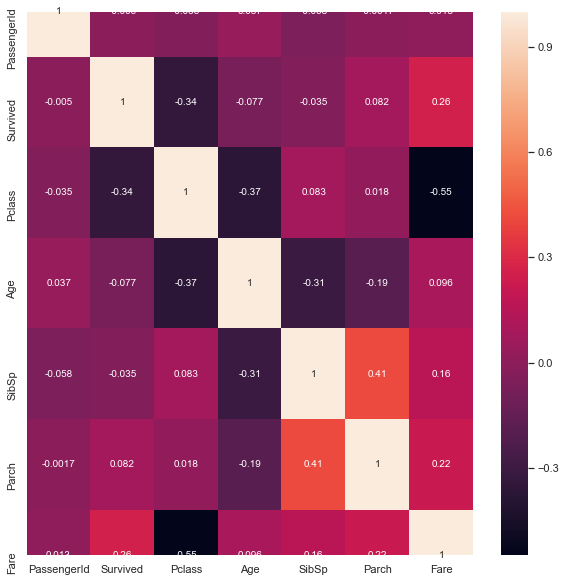

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(), annot=True)# vmin = 0, vmax = +1)
plt.show()

from the barplot below, we can tell the more family members the less surviving probability.

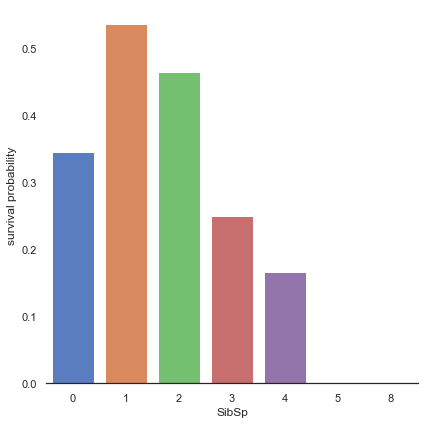

In [20]:
sibps = sns.factorplot(x="SibSp",y="Survived",ci=None,data=train_data,kind="bar", size = 6 , 
palette = "muted")
sibps.despine(left=True)
sibps = sibps.set_ylabels("survival probability")

from the plot below, we can tell which age survived and not survived

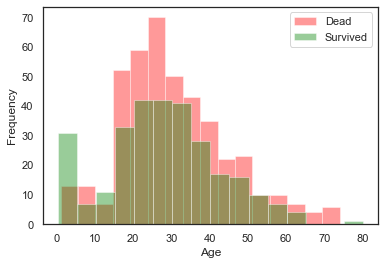

In [21]:
age =sns.distplot(train_data['Age'][(train_data['Survived']==0) &(train_data['Age'].notnull())],color='Red',kde=False)
age =sns.distplot(train_data['Age'][(train_data['Survived']==1) &(train_data['Age'].notnull())],color='Green',kde=False)
age.legend(['Dead','Survived'])
age.set_ylabel('Frequency');

######  Filling the missing data in Age feature

In [22]:
fill_age = list(train_data["Age"][train_data["Age"].isnull()].index)

for i in fill_age : # looping over the age null indexes
    age_med = train_data["Age"].median() # finding the median age
    age_pred = train_data["Age"][((train_data['SibSp'] == train_data.iloc[i]["SibSp"]) & (train_data['Parch'] == train_data.iloc[i]["Parch"]) & (train_data['Pclass'] == train_data.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        train_data['Age'].iloc[i] = age_pred
    else :
        train_data['Age'].iloc[i] = age_med

In [23]:
fill_age = list(test_data["Age"][test_data["Age"].isnull()].index)

for i in fill_age :
    age_med = test_data["Age"].median()
    age_pred = test_data["Age"][((test_data['SibSp'] == test_data.iloc[i]["SibSp"]) & (test_data['Parch'] == test_data.iloc[i]["Parch"]) & (test_data['Pclass'] == test_data.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        test_data['Age'].iloc[i] = age_pred
    else :
        test_data['Age'].iloc[i] = age_med

filling the missing data in Embarked

In [24]:
train_data['Embarked']=train_data['Embarked'].fillna('S')

In [25]:
train_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [26]:
test_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

filling the missing data in Cabin

In [27]:
train_data["Cabin"]=train_data["Cabin"].map(lambda x: 0 if pd.isnull(x) else 1)

In [28]:
test_data["Cabin"]=test_data["Cabin"].map(lambda x: 0 if pd.isnull(x) else 1)

filling the missing data in Fare

In [29]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

filling the missing data in Sex

In [30]:
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female":1})

In [31]:
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female":1})

###### Heatmap showing the null values of the 2 datasets

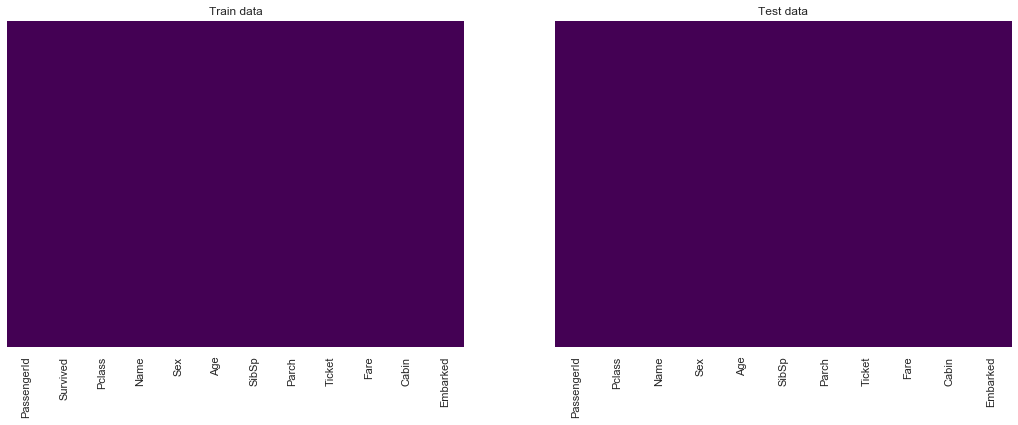

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train_data.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test_data.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

###### we decide to drop the Name & Ticket featuers since they don't impact the surviving probability

In [33]:
train_data.drop(columns=['Name','Ticket'],inplace=True)
test_data.drop(columns=['Name','Ticket'],inplace=True)

In [34]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin            int64
Embarked         int64
dtype: object

In [35]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin            int64
Embarked         int64
dtype: object

In [36]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,1,26.0,0,0,7.9250,0,0
3,4,1,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,0,35.0,0,0,8.0500,0,0


Here we define our target and predictors

In [37]:
X_train= train_data[['Pclass','Sex','Age','Cabin','Embarked']]
y_train= train_data['Survived']


In [38]:
X_test =test_data[['Pclass','Sex','Age','Cabin','Embarked']]


In [39]:
scaler = StandardScaler()
_x = scaler.fit(X_train)

_tx = scaler.fit(X_test)


In [40]:
X_train_scaled = pd.DataFrame(_x.transform(X_train),columns=X_train.columns)

In [41]:
X_test_scaled = pd.DataFrame(_tx.transform(X_test),columns=X_test.columns)

In [42]:
knn_model= KNeighborsClassifier()

knn_model.fit(X_train_scaled,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
knn_model.score(X_train_scaled,y_train)

0.8507295173961841

In [44]:
cross_val_score(knn_model,X_train_scaled,y_train).mean()

0.8069584736251403

In [45]:
random_state = 101
 
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC', 
              'RandomForestClassifier', 'XGBClassifier', 'ExtraTreesClassifier'
              , 'GradientBoostingClassifier','AdaBoostClassifier','GaussianNB','SVM']
models = [ ('LogisticRegression',LogisticRegression(random_state=random_state)),
          ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=random_state)),
          ('SVC', SVC(random_state=random_state)),
          ('RandomForestClassifier',RandomForestClassifier(random_state=42)),
          ('ExtraTreesClassifier',ExtraTreesClassifier(random_state=random_state)),
          ('GradientBoostingClassifier',GradientBoostingClassifier(random_state=random_state)),
          ('AdaBoostClassifier',AdaBoostClassifier(random_state=random_state)),
          ('GaussianNB',GaussianNB()),
          ('SVM ',svm.SVC())
         ]
model_accuracy = []
for m,model in models:
    print (m , ':')
    model.fit(X_train_scaled, y_train)
    accuracy = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()
    model_accuracy.append(accuracy)
    print(accuracy)
    print('\n')

LogisticRegression :
0.7990999674798133


DecisionTreeClassifier :
0.8036447788432246


SVC :
0.8159541128461122


RandomForestClassifier :
0.8193437305725574


ExtraTreesClassifier :
0.8035880015050783


GradientBoostingClassifier :
0.8261109083771221


AdaBoostClassifier :
0.7979889261139228


GaussianNB :
0.7688315819599141


SVM  :
0.8159541128461122




In [46]:
kfold = StratifiedKFold(n_splits=10)

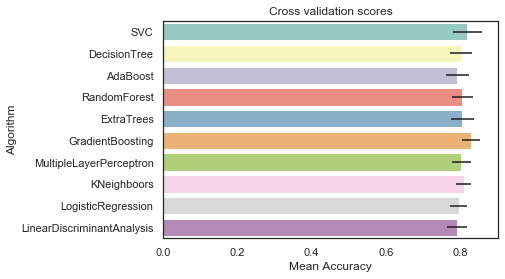

In [47]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_scaled, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [48]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train_scaled,y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    4.1s finished


In [49]:
gsadaDTC.best_score_

0.8080808080808081

In [50]:
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train_scaled,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:   24.2s finished


0.8103254769921436

In [51]:
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs=4, verbose = 1)

gsRFC.fit(X_train_scaled,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:   29.6s finished


0.8069584736251403

In [52]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train_scaled,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   22.7s
[Parallel(n_jobs=4)]: Done 638 tasks      | elapsed:   46.0s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   50.2s finished


0.8181818181818182

In [ ]:
# predicted = gsGBC.predict(test_data[['Pclass','Sex','Age','Cabin','Embarked']])

In [76]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train_scaled,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   29.8s finished


0.8237934904601572

In [110]:
pred1 = gsSVMC.predict(X_test_scaled)

In [116]:
test_data.shape

(418, 9)

In [117]:
test_data['Survived'] = pred1

In [118]:
subm = test_data[['PassengerId','Survived']]

In [119]:
subm.to_csv('submit.csv',index=False)